          0         1
0 -0.111799 -0.289903
1  0.497803  0.271755


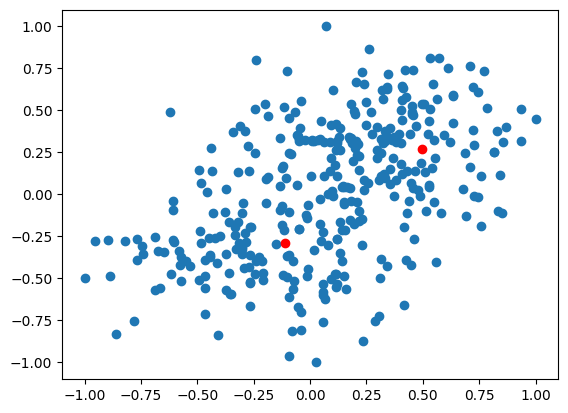

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from grid import create_grid_synopsis
from lloyd import lloyd_with_weights
from util import normalise

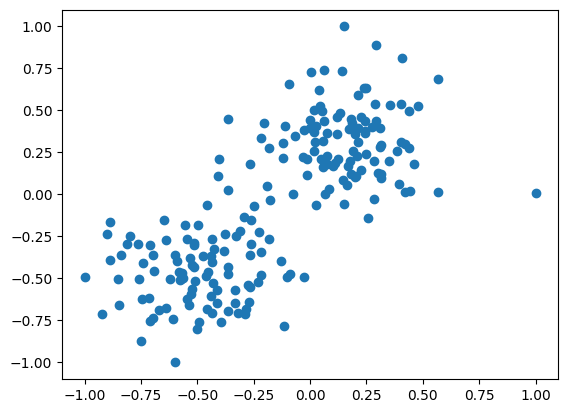

In [2]:
data1 = np.random.multivariate_normal(mean=[1,1], cov=[[1,0],[0,1]], size=100)
df1 = pd.DataFrame(data1)
data2 = np.random.multivariate_normal(mean=[4,4], cov=[[1,0],[0,1]], size=100)
df2 = pd.DataFrame(data2)
df = normalise(pd.concat([df1, df2]))
plt.scatter(x=df[0], y=df[1])

In [17]:
weighted_points = create_grid_synopsis(df, 1, 2, 6)

In [4]:
weighted_points.head()

,0,1,count
0,-0.833333,-0.833333,5.793879
1,-0.833333,-0.500000,10.869614
2,-0.833333,-0.166667,7.263001
3,-0.833333,0.166667,0.502091
4,-0.833333,0.500000,-1.669428


           0         1      count
0  -0.833333 -0.833333   5.793879
1  -0.833333 -0.500000  10.869614
2  -0.833333 -0.166667   7.263001
3  -0.833333  0.166667   0.502091
4  -0.833333  0.500000   0.000000
5  -0.833333  0.833333   3.020941
6  -0.500000 -0.833333   9.738729
7  -0.500000 -0.500000  29.848933
8  -0.500000 -0.166667   9.638310
9  -0.500000  0.166667   2.895497
10 -0.500000  0.500000   0.701049
11 -0.500000  0.833333   1.920934
12 -0.166667 -0.833333   4.339299
13 -0.166667 -0.500000  13.037112
14 -0.166667 -0.166667   8.879896
15 -0.166667  0.166667   8.211393
16 -0.166667  0.500000   6.115601
17 -0.166667  0.833333   0.000000
18  0.166667 -0.833333   1.064972
19  0.166667 -0.500000   0.305614
20  0.166667 -0.166667   4.726033
21  0.166667  0.166667  29.656173
22  0.166667  0.500000  31.836953
23  0.166667  0.833333   6.542912
24  0.500000 -0.833333   0.813660
25  0.500000 -0.500000   0.000000
26  0.500000 -0.166667   0.000000
27  0.500000  0.166667   7.565112
28  0.500000  

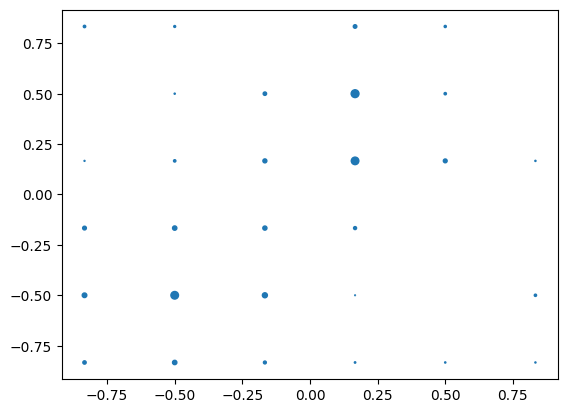

In [24]:
v = weighted_points.copy()
v.loc[v["count"] < 0, "count"] = 0
plt.scatter(x=v[0], y=v[1], s=v["count"])
print(v)

In [19]:
centers = pd.DataFrame(lloyd_with_weights(2, weighted_points.iloc[:, :-1], weighted_points.iloc[:, -1], n_iter=10))
print(centers)

          0         1
0 -0.469401 -0.467969
1  0.147896  0.340969


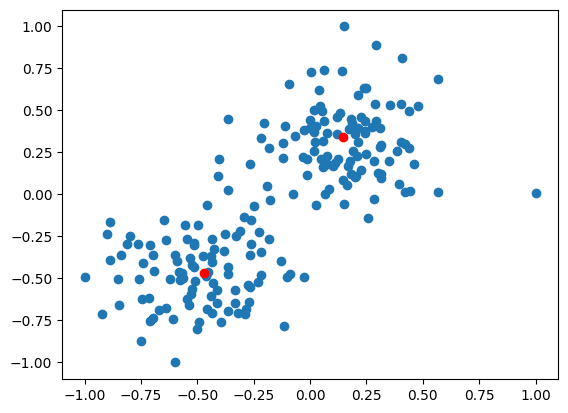

In [20]:
plt.scatter(x=df[0], y=df[1])
plt.scatter(x=centers[0], y=centers[1], color="red")